In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!curl https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv -o abalone.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  187k  100  187k    0     0  1275k      0 --:--:-- --:--:-- --:--:-- 1275k


# Read in Abalone data

In [37]:
df = pd.read_csv("abalone.csv")

# Explore the data

In this lab, you're going to drop features and scatter the points after projecting along 2 principle components axes.

For example, you may drop columns in `Pandas` by typing 


1. Prune the data. Drop columns `Sex` and/or `Rings`. \
   ```matrix = df.loc[:, df.columns != "Sex"]```

1. Calculate the covariance matrix. You can calculate the covariance matrix via: \
   $$Cov(X_i, X_j) = \mathbb{E}[(X_i - \mu_{x_i})(X_j - \mu_{x_j})^T]$$

1. Calculate the first two components of PCA. You can feel free to use `np.linalg.eig`.

1. Verify the principle components. To calculate PCA, feel free to use the PCA function from `scikit.learn`. \

  ```
  from sklearn.decomposition import PCA
  # Two components of PCA
  pca = PCA(2)

  # Fit on data
  pca.fit(A)

  # Access values and vectors
  print(pca.components_)
  print(pca.explained_variance_)

  # transform data
  B = pca.transform(A)
  print(B)
  ```

1. Scatter the data to view it in two dimensions

In [38]:
df = df.drop(labels=["Sex"], axis="columns")
display(df)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [43]:
Cov1 = np.cov(df.T)
print(Cov1)
print(Cov1.shape)

[[1.44223076e-02 1.17608250e-02 4.15691189e-03 5.44907081e-02
  2.39349454e-02 1.18872298e-02 1.50071720e-02 2.15561736e-01]
 [1.17608250e-02 9.84855103e-03 3.46054721e-03 4.50381820e-02
  1.96742019e-02 9.78729548e-03 1.25066369e-02 1.83871673e-01]
 [4.15691189e-03 3.46054721e-03 1.74950266e-03 1.68034708e-02
  7.19488681e-03 3.66016741e-03 4.75889986e-03 7.51786501e-02]
 [5.44907081e-02 4.50381820e-02 1.68034708e-02 2.40481389e-01
  1.05518032e-01 5.19461632e-02 6.52158684e-02 8.54408544e-01]
 [2.39349454e-02 1.96742019e-02 7.19488681e-03 1.05518032e-01
  4.92675507e-02 2.26749006e-02 2.72709563e-02 3.01203734e-01]
 [1.18872298e-02 9.78729548e-03 3.66016741e-03 5.19461632e-02
  2.26749006e-02 1.20152839e-02 1.38495613e-02 1.78057215e-01]
 [1.50071720e-02 1.25066369e-02 4.75889986e-03 6.52158684e-02
  2.72709563e-02 1.38495613e-02 1.93773832e-02 2.81663350e-01]
 [2.15561736e-01 1.83871673e-01 7.51786501e-02 8.54408544e-01
  3.01203734e-01 1.78057215e-01 2.81663350e-01 1.03952659e+01]]

In [47]:
eigval, eigvec = np.linalg.eig(Cov1)
print(eigval)
print(eigvec)

[1.04954314e+01 2.39268823e-01 3.02087647e-03 2.60218996e-03
 1.05068657e-03 1.47688518e-04 4.88782005e-04 4.17493194e-04]
[[-2.10513202e-02  1.83052752e-01 -7.42040211e-01  9.06887398e-02
   3.07007218e-02 -6.18893826e-01  1.52311416e-01 -5.43508715e-03]
 [-1.79401219e-02  1.48804192e-01 -5.96175335e-01  4.20854302e-02
  -2.33409653e-02  7.83141972e-01  7.49734266e-02 -2.93613363e-02]
 [-7.31629638e-03  5.24595599e-02 -1.40358287e-01 -3.71173260e-02
  -1.45782231e-03 -4.21715859e-02 -9.10437257e-01 -3.81365645e-01]
 [-8.36804920e-02  8.34461310e-01  2.28847916e-01 -2.20616051e-01
   1.25570884e-01 -2.50039224e-03  1.82698066e-01 -3.82722100e-01]
 [-2.97346596e-02  3.99951598e-01  1.36354791e-01  7.54544047e-01
  -3.31709499e-01  5.43703582e-03 -1.68819392e-01  3.35655300e-01]
 [-1.74599170e-02  1.83252786e-01 -7.74498237e-03 -7.33235758e-02
   7.56051666e-01  2.91035964e-02 -2.30202123e-01  5.78984522e-01]
 [-2.74311519e-02  2.05272453e-01 -5.65032111e-02 -6.04242412e-01
  -5.48722324

In [54]:
xpoint = df.dot(eigvec.T[0])
ypoint = df.dot(eigvec.T[1])

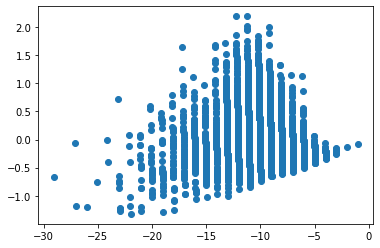

In [56]:
plt.scatter(xpoint, ypoint)

In [50]:
from sklearn.decomposition import PCA
# Two components of PCA
pca = PCA(2)

# Fit on data
pca.fit(df)

# Access values and vectors
print(pca.components_)
print(pca.explained_variance_)


[[ 0.02105132  0.01794012  0.0073163   0.08368049  0.02973466  0.01745992
   0.02743115  0.99510682]
 [ 0.18305275  0.14880419  0.05245956  0.83446131  0.3999516   0.18325279
   0.20527245 -0.0979371 ]]
[10.49543138  0.23926882]


In [51]:
# transform data
B = pca.transform(df)
print(B)

[[ 5.00480331 -0.86692655]
 [-2.99106199 -0.43457164]
 [-0.94603495 -0.08673867]
 ...
 [-0.88806992  0.5087862 ]
 [ 0.0998919   0.34089986]
 [ 2.18474351  1.11378693]]


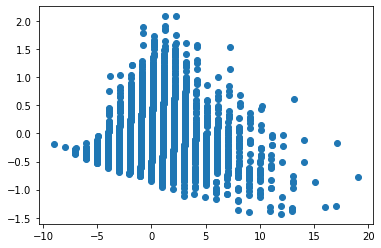

In [52]:
plt.scatter(B.T[0], B.T[1])

In [53]:
PCA?